<b><i>TRƯỜNG ĐẠI HỌC MỎ - ĐỊA CHẤT</i></b>
<center>
    <h1>ĐỒ ÁN MÔN HỌC: KHOA HỌC MÁY TÍNH</h1>
    <h2>Nhận diện và phân loại hoa quả theo màu sắc</h2>
</center>


----

* Họ và tên: Khúc Thị Nhài
* MSV: 1921050455
* Email: 1921050455@student.humg.edu.vn
* Lớp: DCCTKH64B

### [1. Import một số thư viện](#import)
### [2. Đọc dữ liệu](#read_data) 
### [3. Mô hình huấn luyện](#model) 
### [4. Vẽ biểu đồ](#chart) 
### [5. Lưu mô hình huấn luyện](#save)
### [6. Đưa dữ liệu vào mô hình huấn luyện](#train)

<a id="import"></a>
## <center>Import một số thư viện</center>
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 
import pathlib
import os

In [2]:
## Import tắt cảnh báo
import warnings 
warnings.filterwarnings('ignore')

In [3]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model

<a id="read_data"></a>
## <center>Đọc dữ liệu</center>
---

In [4]:
train_direction = os.listdir("Data/Fruit-Data/train")
test_direction = os.listdir("Data/Fruit-Data/test")

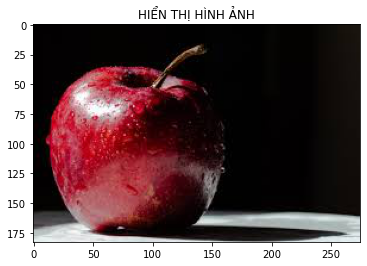

In [5]:
# Hiển thị hình ảnh
img = plt.imread("Data/Fruit-Data/train/Apple/images.jpeg")

plt.title("HIỂN THỊ HÌNH ẢNH")
plt.imshow(img)

In [6]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = training_datagen.flow_from_directory(
            "Data/Fruit-Data/train",
            classes=train_direction,
            class_mode="categorical",
            color_mode='rgb',
            batch_size=32,
            target_size=(100, 100),
            subset="training"
            )
validation_data = training_datagen.flow_from_directory(
            "Data/Fruit-Data/train",
            classes=train_direction,
            class_mode="categorical",
            color_mode='rgb',
            batch_size=32,
            target_size=(100, 100),
            subset="validation"
            )
test_data = test_datagen.flow_from_directory(
            "Data/Fruit-Data/test",
            color_mode='rgb',
            batch_size=32,
            class_mode="categorical",
            target_size=(100, 100),
            )

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


<a id="model"></a>
## <center>Mô hình huấn luyện</center>
---

In [7]:
imageHeight = 100
imageWidth = 100

inputShape = (imageHeight, imageWidth, 3)

In [8]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=inputShape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_direction), activation="softmax"))  # Output


In [9]:
model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                        

In [10]:
epochs = 10
history = model.fit(train_data, validation_data=validation_data, epochs=epochs, verbose=1)

Epoch 1/10
58/58 [==============================] - 186s 3s/step - loss: 2.3413 - accuracy: 0.1423 - val_loss: 2.0718 - val_accuracy: 0.1870
Epoch 2/10
58/58 [==============================] - 177s 3s/step - loss: 2.0356 - accuracy: 0.2194 - val_loss: 1.9507 - val_accuracy: 0.2348
Epoch 3/10
58/58 [==============================] - 177s 3s/step - loss: 1.9097 - accuracy: 0.2477 - val_loss: 1.8400 - val_accuracy: 0.2413
Epoch 4/10
58/58 [==============================] - 180s 3s/step - loss: 1.7746 - accuracy: 0.2988 - val_loss: 1.8417 - val_accuracy: 0.2326
Epoch 5/10
58/58 [==============================] - 177s 3s/step - loss: 1.7088 - accuracy: 0.3286 - val_loss: 1.6768 - val_accuracy: 0.2891
Epoch 6/10
58/58 [==============================] - 189s 3s/step - loss: 1.5577 - accuracy: 0.4041 - val_loss: 1.6195 - val_accuracy: 0.3261
Epoch 7/10
58/58 [==============================] - 176s 3s/step - loss: 1.4266 - accuracy: 0.4764 - val_loss: 1.5593 - val_accuracy: 0.3587
Epoch 8/10
58

<a id="chart"></a>
## <center>Vẽ biểu đồ</center>
---

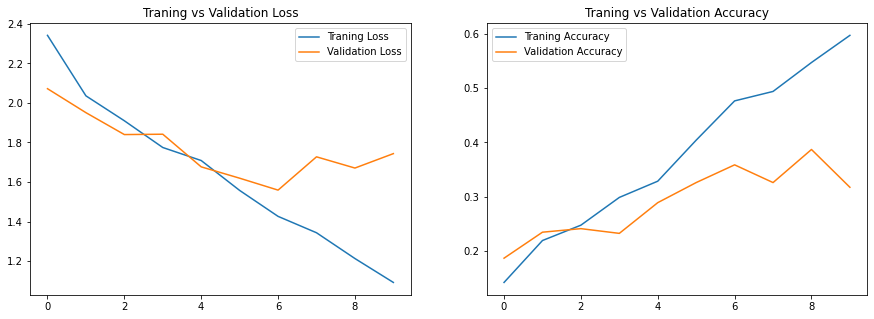

In [11]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label="Traning Loss")
plt.plot(range(epochs),val_loss,label="Validation Loss")
plt.title("Traning vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs),accuracy,label="Traning Accuracy")
plt.plot(range(epochs),val_accuracy,label="Validation Accuracy")
plt.title("Traning vs Validation Accuracy")
plt.legend()

<a id="save"></a>
## <center>Lưu mô hình huấn luyện</center>
---

In [12]:
model.save("model_CNN")

INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


In [13]:
model = load_model("model_CNN")
fruitMap = dict([(v, k) for k, v in train_data.class_indices.items()])

fruitMap

{0: 'Apple',
 1: 'avocado',
 2: 'Banana',
 3: 'cherry',
 4: 'kiwi',
 5: 'mango',
 6: 'orange',
 7: 'pinenapple',
 8: 'strawberries',
 9: 'watermelon'}

<a id="train"></a>
## <center>Đưa dữ liệu vào mô hình huấn luyện</center>
---

1/1 [==============================] - 0s 56ms/step
Đây là hình ảnh của Apple với độ chính xác 40.02%


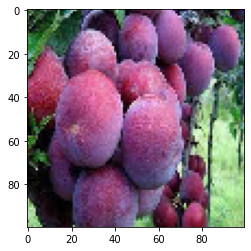

In [16]:
path = pathlib.Path("Data/Fruit-Data/")

image = tf.keras.preprocessing.image.load_img(path, target_size=(100, 100))

plt.imshow(image)
image = np.array(image)
image = image / 255
image = image.reshape(1, imageWidth, imageHeight, 3)
predictions = model.predict(image)
predictions

score = tf.nn.softmax(predictions[0])
print("Đây là hình ảnh của {} với độ chính xác {:.2f}%".format(fruitMap[np.argmax(score)], 100 * np.max(predictions)))